## Gevorg Atanesyan (moodle data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv('logs_DS116 CS343_20201030-1511.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            19435 non-null  object
 1   User full name  19435 non-null  object
 2   Affected user   19435 non-null  object
 3   Event context   19435 non-null  object
 4   Component       19435 non-null  object
 5   Event name      19435 non-null  object
 6   Description     19435 non-null  object
 7   Origin          19435 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [4]:
instructors = ['145','1770', '2','-',]

In [5]:
data.columns = data.columns.str.replace(" ", "")

In [6]:
data = data.loc[~data.Userfullname.isin(instructors)]

In [7]:
data['Time'].apply(lambda x: '8/09/20' in x).value_counts()

False    12947
True       499
Name: Time, dtype: int64

In [8]:
data.Time = pd.to_datetime(data.Time, dayfirst=True)

In [9]:
data.head()

,Time,Userfullname,Affecteduser,Eventcontext,Component,Eventname,Description,Origin
11,2020-10-30 14:01:00,2457,-,File: Project guidlines,File,Course module viewed,The user with id '2457' viewed the 'resource' ...,web
12,2020-10-30 14:01:00,2457,-,Course: DS 116 / CS 343 Data Visualization - F...,System,Course viewed,The user with id '2457' viewed the course with...,web
13,2020-10-30 13:37:00,994,-,Course: DS 116 / CS 343 Data Visualization - F...,System,Course viewed,The user with id '994' viewed the course with ...,web
14,2020-10-30 12:28:00,2128,2128,File: MD-continuous,System,Course activity completion updated,The user with id '2128' updated the completion...,web
15,2020-10-30 12:28:00,2128,2128,File: MD-continuous,System,Course activity completion updated,The user with id '2128' updated the completion...,web


# Before and After quiz analysis

In [10]:
secquiz = data[(data.Time > '2020-10-14 10:00:00') & (data.Time < '2020-10-14 23:00:00')]

In [11]:
befsecquiz = data[(data.Time > '2020-10-13 10:00:00 ') & (data.Time < '2020-10-13 23:59:00')]

In [12]:
firstquiz = data[(data.Time > '2020-09-09 10:00:00 ') & (data.Time < '2020-09-09 23:00:00')]

In [13]:
beffirstquiz = data[(data.Time > '2020-09-08 10:00:00') & (data.Time < '2020-09-08 23:00:00')]

The data's Time is converted to DateTime instructor's id are dropped. I will compare the First quiz day, which was held on September 9, and the Second quiz held on October 14. Note that the first Time Instructors did not inform students that the quiz will be held. So I will try to find out the differences between what students have done in those days. I will use the component feature to show the differences.

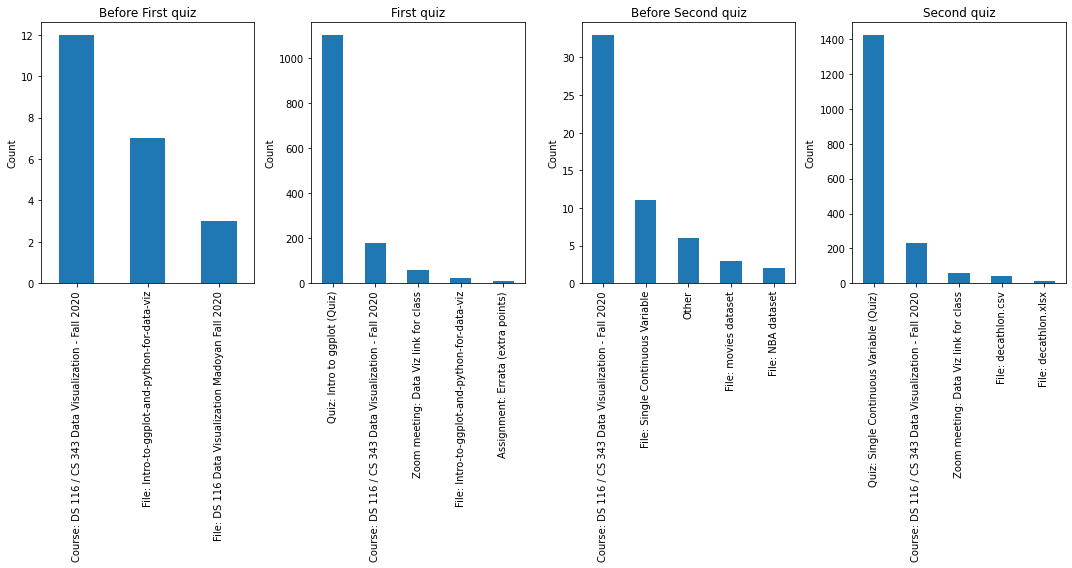

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
beffirstquiz.Eventcontext.value_counts()[:5].plot(kind = 'bar')
plt.title('Before First quiz')
plt.ylabel('Count')
plt.subplot(1,4,2)
firstquiz.Eventcontext.value_counts()[:5].plot(kind = 'bar')
plt.title('First quiz')
plt.ylabel('Count')
plt.subplot(1,4,3)
befsecquiz.Eventcontext.value_counts()[:5].plot(kind = 'bar')
plt.title('Before Second quiz')
plt.ylabel('Count')
plt.subplot(1,4,4)
secquiz.Eventcontext.value_counts()[:5].plot(kind = 'bar')
plt.title('Second quiz')
plt.ylabel('Count')
plt.tight_layout()

1. First, I will compare before quiz days. From the plots, it is visible that the differences are huge. Before the first quiz, only seven people downloaded Intro to GGplot file, but Before the second quiz Single Conti Variable file downloaded are almost two times more. Also, they downloaded datasets and Other files to prepare for the quiz.
2. If we compare the quizzes day, we can see that the Second quiz has more logs. It has almost 1400 records compared with the first-day examination, which has 1100 logs.
3. Concluding these plots, if instructors warned students that they would have a quiz, they started to prepare for the quiz.
4. I took only the first five events to make visualization better.


# After War vs Before War analysis.

As we now started from September 27 in 2020, the war started in Nagorno Karabakh, which greatly influenced people's wellness. So I will try to compare one week before and after of war. 

In [15]:
befwar = data[(data.Time < '2020-09-27 10:00:00') & (data.Time > '2020-09-20 10:00:00') ]

In [16]:
afterwar = data[(data.Time > '2020-09-27 10:00:00') & (data.Time < '2020-10-03 10:00:00') ]

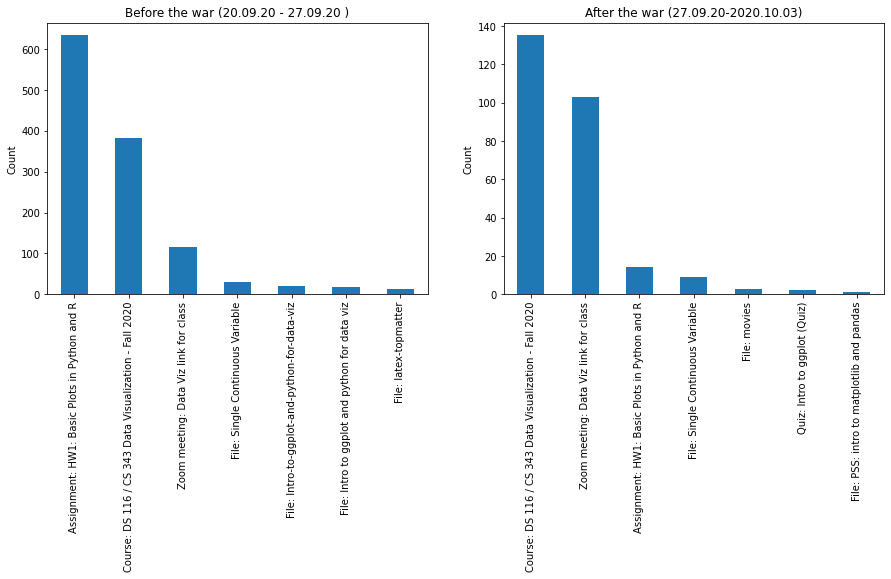

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
befwar.Eventcontext.value_counts()[:7].plot(kind = 'bar')
plt.title('Before the war (20.09.20 - 27.09.20 )')
plt.ylabel('Count')
plt.subplot(1,2,2)
afterwar.Eventcontext.value_counts()[:7].plot(kind = 'bar')
plt.title('After the war (27.09.20-2020.10.03)')
plt.ylabel('Count')
plt.show()

From the plots, it is visible that war had a significant influence on student's wellness. Students entered the course almost three times more compared to when the war started. The zoom meeting stayed the same, with about 100 logs. But actually, It is a little bit tricky because students had a homework assignment. Because If we look before the war plot, we can see that in the first place is the HW1 assignments, which had almost 650 logs, which can be the reason for the activity before war days.

# Analysis of Event Context 

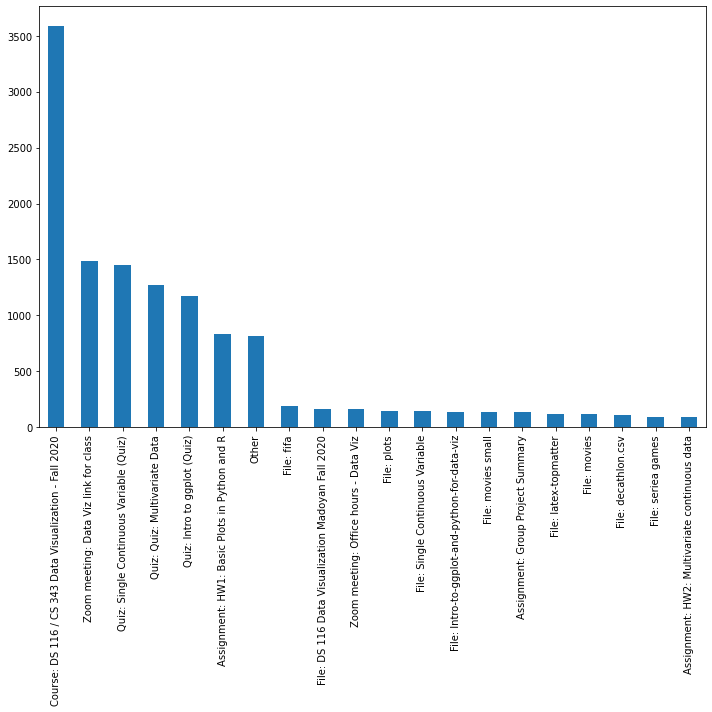

In [18]:
plt.figure(figsize=(10,10))
data.Eventcontext.value_counts()[:20].plot(kind = 'bar')
plt.xticks()
plt.tight_layout()

This plot shows the data's event context's bar plot. We can see what students had done when they entered moodle. But I will try to cover what File is the most downloadable based on the topic. So I will separate the events, which include the file name.

In [19]:
file = ['File: Intro-to-ggplot-and-python-for-data-viz','File: Single Continuous Variable','File: MD-continuous',
        'File: Categorical data','File: Intro to ggplot and python for data viz']

In [20]:
files =data.loc[data.Eventcontext.isin(file)]

In [21]:
files.head()

,Time,Userfullname,Affecteduser,Eventcontext,Component,Eventname,Description,Origin
14,2020-10-30 12:28:00,2128,2128,File: MD-continuous,System,Course activity completion updated,The user with id '2128' updated the completion...,web
15,2020-10-30 12:28:00,2128,2128,File: MD-continuous,System,Course activity completion updated,The user with id '2128' updated the completion...,web
16,2020-10-30 12:28:00,2128,-,File: MD-continuous,File,Course module viewed,The user with id '2128' viewed the 'resource' ...,web
23,2020-10-30 12:02:00,994,-,File: MD-continuous,File,Course module viewed,The user with id '994' viewed the 'resource' a...,web
247,2020-10-28 12:12:00,2762,2762,File: Categorical data,System,Course activity completion updated,The user with id '2762' updated the completion...,web


From moodle, I understand that RMD and PDF files of Intro to GGplot are separated. So it will be better to combine them as one observation.

In [22]:
files.loc[files.Eventcontext ==  'File: Intro-to-ggplot-and-python-for-data-viz'] ='File: Intro to ggplot and python for data viz'

/Users/gevorgatanesyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
counts = files.Eventcontext.value_counts()

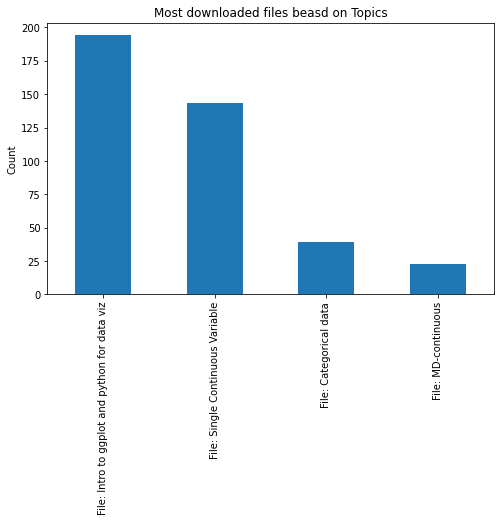

In [24]:
plt.figure(figsize=(8,5))
counts.plot(kind = 'bar')
plt.title("Most downloaded files beasd on Topics")
plt.ylabel('Count')
plt.show()

So we got the most downloaded file's(RMS and PDF) barplot. We can see that Intro to GGplot is the most downloaded file almost 190 times it has been downloaded. The least downloaded is the MD-continuous file downloaded about 25 times. We can conclude that people mostly used Intro to GGplot file. I think it is connected because it is the base of GGplot so if students want to make a simple plot it is more comfortable to download the intro to GGplot.

# Top 5 students by months

In this section, I will compare the top 5 student activity change in September and October. Student names will be extracted from moodle. It will be more enjoyable when students' grades are available, so it will allow us to understand if a student gets low grades and how it affects his or her activity. Hence, we don't have this opportunity I will compare with months.

In [25]:
sept = data[(data.Time > "2020-09-01 10:00:00") & (data.Time < "2020-09-30 10:00:00")]
octo = data[(data.Time > "2020-10-01 10:00:00") & (data.Time < "2020-10-30 10:00:00")]

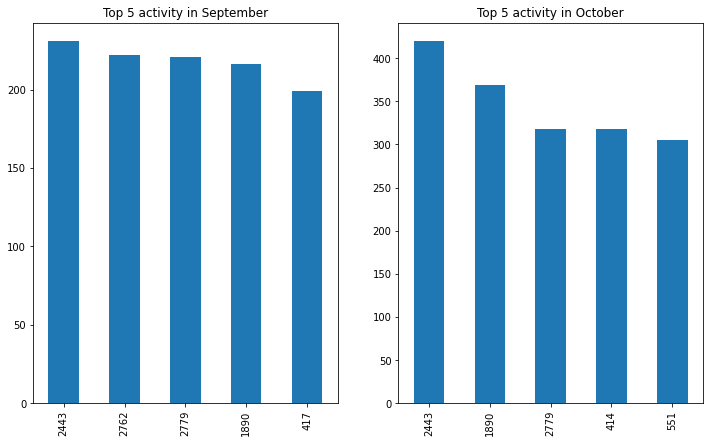

In [26]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sept.Userfullname.value_counts()[:5].plot(kind = 'bar')
plt.title('Top 5 activity in September')
plt.subplot(1,2,2)
octo.Userfullname.value_counts()[:5].plot(kind = 'bar')
plt.title('Top 5 activity in October')
plt.show()

# TA and Professor

In [27]:
data1 = pd.read_csv('logs_DS116 CS343_20201030-1511.csv')

In [28]:
data1.columns = data1.columns.str.replace(" ", "")

In [29]:
instructorid = ['1770', '145']

In [30]:
instructors = data1.loc[data1.Userfullname.isin(instructorid)]


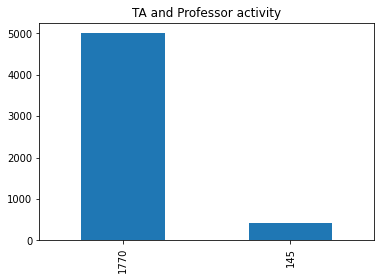

In [31]:
instructors.Userfullname.value_counts().plot(kind = 'bar')
plt.title('TA and Professor activity')
plt.show()

As we can see TA is more active compared with Professor. Because TA checks Homeoverks and Quizes so her logs should be more higher. 